# The lab
## The code below runs for about 30 minutes, so <strong>I do not recommend</strong> to run it.

The optimizers consist of for loops that run and find the best arguments in the given range that optimizes the score of image similarity.
As I mentioned in the main assignment it is not the most performant and reliable way to optimize a function, but its fast to experiment on.

# Using Gamma correction

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met
import copy

def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err


img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

best_filter = 0
best_gamma = 0
best_add = 0
best_mulyply = 0
best_score = 0
best_z = 0

res0 = cv.add(img1,z.astype('float'))
res0 = np.abs(255-res0)
for i in np.arange(-8.9,-9.9,-0.2):
    print(i)
    res = copy.copy(res0)

    kernel = -np.ones((3,3),np.float32)
    kernel[1,1] = kernel[1,1]*(i)
    res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_CONSTANT)

    for j in np.arange(-80,50,10):
        res1 = copy.copy(res)
        res1 = cv.add(res1,j.astype('float'))
        for k in np.arange(0.1,2.0,0.2):
            res2 = copy.copy(res1)
            res2 = cv.multiply(res2.astype('float'),k)

            res3 = copy.copy(res2)

            res3 = (np.log(res3+1)/(np.log(1+np.max(res3))))*255
            res3 = np.array(res3,dtype=np.uint8)

            for gamma in np.arange(0.8,3.2,0.2):
                res3 = copy.copy(res2)
                res3 = res3.astype('float')/255
                res3 = res3**(1.0/gamma)*255
                sim = met.structural_similarity(res3.astype('float'),img2.astype('float'))
                if sim > best_score:
                    best_score = sim
                    best_gamma = gamma
                    best_z = z
                    best_add = j
                    best_mulyply = k
                    best_filter = i

print(str(best_score) + " " + str(best_gamma) + " " + str(best_add) + " " + str(best_mulyply) + " " + str(best_filter) + " " + str(best_z))

-8.9
-9.1
-9.299999999999999
-9.499999999999998
-9.699999999999998
0.7109491272528647 2.5999999999999996 40 1.3000000000000003 -9.1 0


## And the optical representation of the previous result

The mean square error is: 161.20860374414977
The structural similarity is: 0.8633333419680065


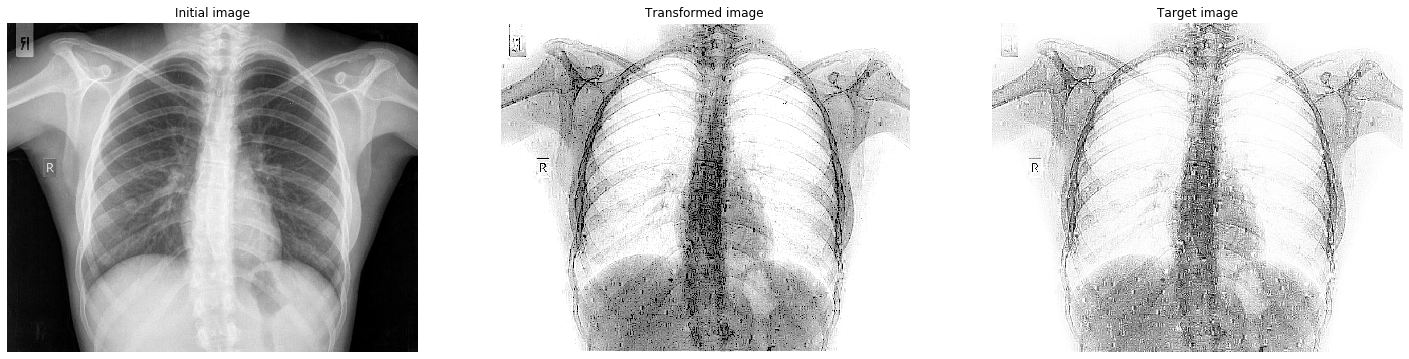

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


# Read the images
img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

# Inverse colors
res = np.abs(255-img1)

# Apply laplacian mask to add the images noise
kernel = -np.ones((3,3),np.float32)
kernel[1,1] = kernel[1,1]*(-9.5)
res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_CONSTANT)

# Apply a linear transformation
res = cv.add(res,-40)
res = cv.multiply(res,1.1)

# Applying gamma correction
gamma = 3.1
res = res.astype('float')/255
res = res**(1.0/gamma)*255

# Some more linear transformation
res = cv.add(res.astype('uint8'),10)

# Increace low values
res[res < 60] += 30

print("The mean square error is: "+str(mse(res,img2)))
print("The structural similarity is: "+str(met.structural_similarity(res.astype('float'),img2.astype('float'))))


fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(131), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title("Initial image")
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title("Transformed image")
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title("Target image")
plt.show()

# Using Log function

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met
import copy

def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err

img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

best_filter = 0
best_add = 0
best_mulyply = 0
best_score = 1000000

for i in np.arange(-8.9,-9.9,-0.2):
    print(i)
    res = np.abs(255-img1)
    
    kernel = -np.ones((3,3),np.float32)
    kernel[1,1] = kernel[1,1]*(i)
    res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_CONSTANT)
    
    for j in np.arange(-80,50,10):
        res1 = copy.copy(res)
        res1 = cv.add(res1,j.astype('float'))
        for k in np.arange(0.1,2.0,0.2):
            res2 = copy.copy(res1)
            res2 = cv.multiply(res2.astype('float'),k)
            res2[res2 > 255] = 255
            res3 = copy.copy(res2)
            
            res3 = (np.log(res3+1)/(np.log(1+np.max(res3))))*255
            res3 = np.array(res3,dtype=np.uint8)
            
            sim = met.structural_similarity(res3.astype('float'),img2.astype('float'))
            ms = mse(res3.astype('float'),img2.astype('float'))
            if ms < best_score:
                best_score = ms
                best_add = j
                best_mulyply = k
                best_filter = i                    


print(str(best_score) +  " " + str(best_add) + " " + str(best_mulyply) + " " + str(best_filter))

-8.9
-9.1
-9.299999999999999
-9.499999999999998
-9.699999999999998
109.28169266770671 -30 0.1 -9.699999999999998


## And the optical representation of the result above

The mean square error is: 120.85515405616225
The structural similarity is: 0.8741907474160613


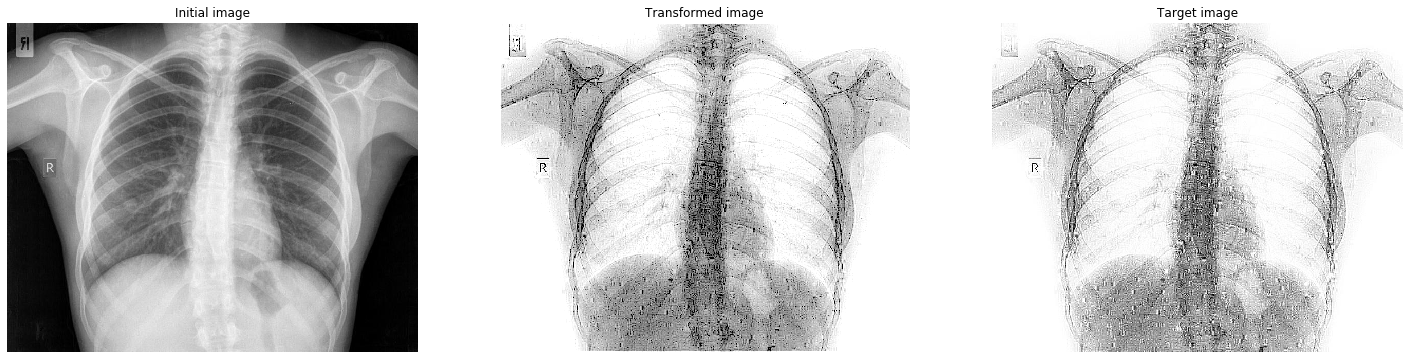

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

# Read the images
img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

# Inverse colors
res = np.abs(255-img1)

# Apply laplacian mask to add the images noise
kernel = -np.ones((3,3),np.float32)
kernel[1,1] = kernel[1,1]*(-9.5)
res = cv.filter2D(res, -1, kernel, borderType=cv.BORDER_CONSTANT)

# Apply a linear transformation
res = cv.add(res,-30)
res = cv.multiply(res,0.2)

# Apply a logarithmic transformation
res = (np.log(res+1)/(np.log(1+np.max(res))))*255
res = np.array(res,dtype=np.uint8)

# Increace low values
res[res < 70] += 30

print("The mean square error is: "+str(mse(res,img2)))
print("The structural similarity is: "+str(met.structural_similarity(res.astype('float'),img2.astype('float'))))


fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(131), plt.imshow(img1, cmap='gray'), plt.axis('off'), plt.title("Initial image")
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title("Transformed image")
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.axis('off'), plt.title("Target image")
plt.show()